In [1]:
!pip install fastai==2.7.9
!pip install fastkaggle==0.0.7
!pip install fasterai==0.1.11
!pip install ipython-autotime==0.3.1
!pip install torch==1.12.1
%load_ext autotime

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: pynvml
    Found existing installation: pynvml 11.5.0
    Uninstalling pynvml-11.5.0:
      Successfully uninstalled pynvml-11.5.0
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.5/225.5 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: fastai
    Found existing installation: fastai 2.7.11
    Uninstalling fastai-2.7.11:
      Successfully uninstalled fastai-2.7.11
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /opt/conda/lib/libtinfo.so.6

In [5]:
from fastai.vision.all import *
from fastai.callback.all import *
from fastai.data.all import *
from fastai.imports import *
from fastai.torch_core import *
from fastai.learner import *
from fastai.fp16_utils import *

from fasterai.sparse.all import *
from fasterai.core.criteria import *
from fasterai.regularize.all import *

from fastkaggle import *

import torch
import torch.nn as nn
import torch.nn.functional as F


set_seed(42)

time: 9.89 s (started: 2023-04-15 08:10:31 +00:00)


In [8]:
@patch
def custom_plot_losses(self: Recorder, skip_start=5, with_valid=True, filename="temp.txt"):
    fig2 = plt.figure("Figure 2")

    idx = (np.array(self.iters)<skip_start).sum()
    train_col = self.metric_names.index('train_loss') - 1 
    plt.plot(self.iters[idx:], L(self.values[idx:]).itemgot(train_col), label='train loss')
    plt.legend()
    if with_valid:
        idx = (np.array(self.iters)<skip_start).sum()
        valid_col = self.metric_names.index('valid_loss') - 1 
        plt.plot(self.iters[idx:], L(self.values[idx:]).itemgot(valid_col), label='valid loss')
        plt.legend()

    
@patch
def custom_plot_values(self: Recorder, skip_start=5, with_valid=True):
    fig3 = plt.figure("Figure 3")
    
    idx = (np.array(self.iters)<skip_start).sum()
    train_col = self.metric_names.index('train_accuracy') - 1 
    plt.plot(self.iters[idx:], L(self.values[idx:]).itemgot(train_col), label='train accuracy')

    plt.legend()
    if with_valid:
        idx = (np.array(self.iters)<skip_start).sum()
        valid_col = self.metric_names.index('valid_accuracy') - 1 
        plt.plot(self.iters[idx:], L(self.values[idx:]).itemgot(valid_col), label='valid accuracy')
        plt.legend()

time: 2.94 ms (started: 2023-04-15 08:10:41 +00:00)


In [9]:
comp = 'paddy-diseases/paddy-diseases'

path = setup_comp(comp, install='"fastcore>=1.4.5" "fastai>=2.7.1" "timm>=0.6.2.dev0"')

time: 3min 26s (started: 2023-04-15 08:10:41 +00:00)


In [10]:
dls = ImageDataLoaders.from_folder(path/"train", 
                                   valid_pct=0.25, 
                                   item_tfms=Resize(256), 
                                   batch_tfms=aug_transforms(   size=64, 
                                                                min_scale=0.75,
                                                                max_rotate=10., 
                                                                min_zoom=0.8, 
                                                                max_zoom=1.2, 
                                                            
                                                            ), 
                                   bs=32)

time: 11.9 s (started: 2023-04-15 08:14:07 +00:00)


In [11]:
sp_cb=[
#       GradientAccumulation(32), 
      SparsifyCallback(sparsity=25, 
                         granularity='filter', 
                         context='local', 
                         criteria=large_final, 
                         schedule=one_cycle),


]

time: 1.06 ms (started: 2023-04-15 08:14:19 +00:00)


In [12]:
model = vgg16_bn(num_classes=10)


time: 2.12 s (started: 2023-04-15 08:14:19 +00:00)


In [13]:
learn = Learner(dls, 
                model, 
                metrics=[accuracy,
                         error_rate,
                        ])
learn.unfreeze()
learn.recorder.train_metrics = True
learn.path = Path("/kaggle/working/")

time: 7.09 ms (started: 2023-04-15 08:14:21 +00:00)


Pruning of filter until a sparsity of [25]%
Saving Weights at epoch 0


epoch,train_loss,train_accuracy,train_error_rate,valid_loss,valid_accuracy,valid_error_rate,time
0,2.240744,0.186538,0.813462,2.065576,0.271635,0.728365,01:23
1,2.125177,0.223878,0.776122,2.024536,0.270673,0.729327,01:15
2,2.107269,0.251442,0.748558,1.983616,0.297596,0.702404,01:17
3,2.057381,0.259135,0.740865,1.969342,0.300000,0.700000,01:16
4,2.020265,0.283013,0.716987,1.896980,0.338462,0.661538,01:15
5,1.964648,0.300481,0.699519,1.854583,0.348077,0.651923,01:15
6,1.926240,0.318269,0.681731,1.793496,0.398558,0.601442,01:14
7,1.884115,0.328205,0.671795,1.730967,0.393269,0.606731,01:15
8,1.837528,0.352564,0.647436,1.669662,0.430288,0.569712,01:14
9,1.809519,0.371474,0.628526,1.623585,0.433173,0.566827,01:14


Sparsity at the end of epoch 0: [0.07]%
Sparsity at the end of epoch 1: [0.08]%
Sparsity at the end of epoch 2: [0.09]%
Sparsity at the end of epoch 3: [0.11]%
Sparsity at the end of epoch 4: [0.12]%
Sparsity at the end of epoch 5: [0.14]%
Sparsity at the end of epoch 6: [0.16]%
Sparsity at the end of epoch 7: [0.19]%
Sparsity at the end of epoch 8: [0.22]%
Sparsity at the end of epoch 9: [0.25]%
Sparsity at the end of epoch 10: [0.29]%
Sparsity at the end of epoch 11: [0.33]%
Sparsity at the end of epoch 12: [0.38]%
Sparsity at the end of epoch 13: [0.43]%
Sparsity at the end of epoch 14: [0.5]%
Sparsity at the end of epoch 15: [0.57]%
Sparsity at the end of epoch 16: [0.65]%
Sparsity at the end of epoch 17: [0.75]%
Sparsity at the end of epoch 18: [0.86]%
Sparsity at the end of epoch 19: [0.98]%
Sparsity at the end of epoch 20: [1.12]%
Sparsity at the end of epoch 21: [1.28]%
Sparsity at the end of epoch 22: [1.46]%
Sparsity at the end of epoch 23: [1.67]%
Sparsity at the end of epoc

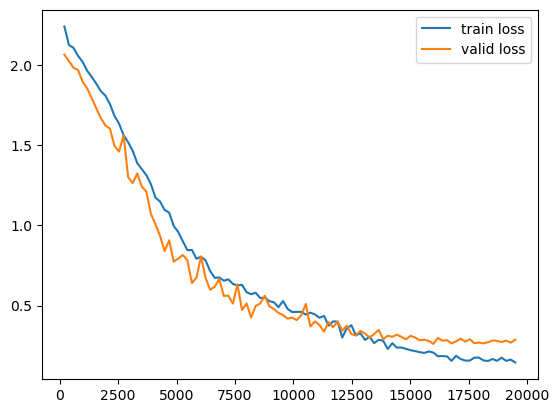

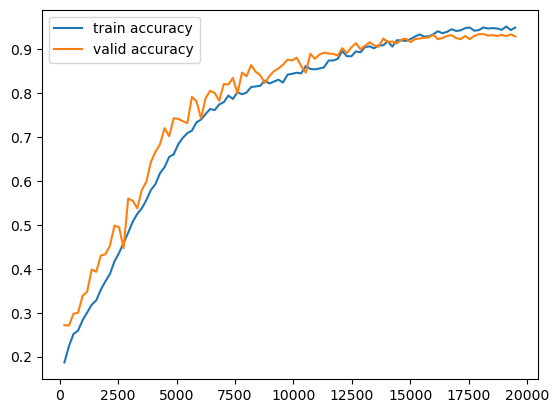

time: 2h 5min 50s (started: 2023-04-15 08:14:25 +00:00)


In [18]:
learn.fit_one_cycle(100, 3e-5, cbs=sp_cb)
                    
learn.recorder.custom_plot_losses()
learn.recorder.custom_plot_values()

In [23]:
learn.export(Path("/kaggle/working/VGG16_bn_sparse25.pkl"))

time: 1.77 s (started: 2023-04-15 10:20:15 +00:00)


In [35]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters())

time: 856 µs (started: 2023-04-15 10:21:58 +00:00)


In [36]:
count_parameters(learn.model)


134309962

time: 7.57 ms (started: 2023-04-15 10:21:58 +00:00)


In [37]:
pruner = Pruner()
pruned_model = pruner.prune_model(learn.model)

time: 51.2 ms (started: 2023-04-15 10:21:58 +00:00)


In [38]:
pruned_learn = Learner(dls, pruned_model.cuda(), metrics=accuracy)


time: 3.48 ms (started: 2023-04-15 10:21:59 +00:00)


In [39]:
pruned_learn.validate()

(#2) [0.2877223491668701,0.9298076629638672]

time: 17.2 s (started: 2023-04-15 10:21:59 +00:00)


In [40]:
count_parameters(pruned_learn)

102181178

time: 3.13 ms (started: 2023-04-15 10:22:16 +00:00)


In [41]:
pruned_learn.export(Path("/kaggle/working/VGG16_bn_sparse25_pruned.pkl"))

time: 1.29 s (started: 2023-04-15 10:22:16 +00:00)
